<a href="https://colab.research.google.com/github/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/TDTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
---
# Classification de chance de survie au Titanic

## Données du naufrage 
Le TD utilisera l'ensemble de données issues de 
[Titanic Dataset](https://www.kaggle.com/datasets/sakshisatre/titanic-dataset?select=The+Titanic+dataset.csv) que vous devez télécharger (il vous faudra créer un compte (gratuit)).

Ce fichier CSV contient presque 1300 données sur les voyageurs présents sur le Titanic. Pour chaque personne il y a: 
 - le nom, la classe, la survie,  le genre, l'âge, le nombre de personnes (si voyage en famille), le prix du ticket et le type de cabine.

---
Vous vous baserez sur les  solutions données à la création de réseaux de neurones.

- Vous utiliserez les colonnes pclass, survived, gender, age, family, fare, embarked.
  - la colonne survived étant la sortie.


In [2]:
#quelques imports utiles
import numpy as np
import random as rnd

----
Vous utiliserez **la bibliothèque Pandas** pour récupérer les valeurs.

In [3]:
import pandas as pd

#################
#lire un fichier csv
filename="The Titanic dataset.csv"
df = pd.read_csv(filename)

#lire un fichier csv où les valeurs sont séparées par des tabulation sous un encodate ISO 8859-1
#df = pd.read_csv(filename, sep='\t', encoding='ISO-8859-1')


----
### Normalisation des données.

Il faut donner en entrée du réseau de neurone un vecteur de réels entre  0 et 1.
- Il faut donc normaliser les valeurs.
- Ainsi l'exemple 1 :
  - classe 3, homme, 42 ans, seul, tarif 7.55 £ (env 9000€ actuels)
  - [3, male, 42, 0, 7.55] devient [1., 0., 0.0147, 0.525, 0. , 0.] (3/3 (val classe max), 0 (on fixe male=0, female=1), 7.55/512.3 (prix max), 42/80 (age max), 0/6(max accompagnants), embarked=0 (on fixe 0 si pas de cabine, 1 pour cabine S, 2 pour C, 3 pour Q))
  - la sortie de l'exemple 1 est [0] (décès)

In [4]:
#################
#extraire les colonnes
####### CLASSE
col_classe = df['pclass'].copy()

In [5]:
#petite verification 
col_classe[0:5]

0    3
1    3
2    3
3    2
4    3
Name: pclass, dtype: int64

In [6]:
#normalisation simple
maxi_classe = col_classe.max()
print(maxi_classe)
col_classe = col_classe/maxi_classe

3


In [7]:
#petite verification 
col_classe[0:5]

0    1.000000
1    1.000000
2    1.000000
3    0.666667
4    1.000000
Name: pclass, dtype: float64

In [8]:
####### FAMILLE
col_family = df['family'].copy()

In [31]:
#traitement des éventuelles cases vides et normalisation
maxi_family = col_family.max()

for i in range(col_family.size):
    if col_family[i] != col_family[i]: #si une valeur est nulle, choisir une valeur aléatoire parmi les valeurs de family
        col_family[i] = float(rnd.randint(0,int(maxi_family)))

col_family = col_family/maxi_family

In [9]:
####### PRIX
col_fare = df['fare'].copy()

In [10]:
#traitement des éventuelles cases vides et normalisation
maxi_fare = col_fare.max()
col_fare = col_fare/maxi_fare
for i in range(col_fare.size):
    if col_fare[i] != col_fare[i]: col_fare[i] = 0 #pas de prix => 0£ (peut être membre d'equipage)

In [13]:
####### AGE
col_age = df['age'].copy()

In [14]:
#verification qu'il y a bien des valeurs dans toutes les cases 
assert not np.any(np.isnan(col_age))

In [15]:
#simple ,normalisation
maxi_age = col_age.max()
col_age = col_age/maxi_age

In [16]:
####### GENRE
col_genre = df['gender'].copy()

In [17]:
tab_genre = np.zeros(col_genre.size, dtype=int)

In [18]:
for i in range(col_genre.size):
    if col_genre[i] == 'male':
        tab_genre[i] = 0
    elif col_genre[i] == 'female':
        tab_genre[i] = 1
    else:#s'il manque une valeur, choisir une valeur aléatoire
        tab_genre[i] = rnd.randint(0,1)

In [21]:
####### CABINE
col_embarked = df['embarked'].copy()

In [22]:
tab_embarked = np.zeros(col_embarked.size, dtype=int)

In [23]:
for i in range(col_embarked.size):
    if col_embarked[i] == 'S':
        tab_embarked[i] = 1
    elif col_embarked[i] == 'C':
        tab_embarked[i] = 2
    elif col_embarked[i] == 'Q':
        tab_embarked[i] = 3
    else:
        tab_embarked[i] = 0

maxi_embarked = tab_embarked.max()
tab_embarked = tab_embarked / maxi_embarked

In [24]:
tab_embarked[0:5]

array([0.        , 0.        , 0.33333333, 0.33333333, 0.33333333])

In [25]:
####### SURVIE
col_survie = df['survived']

In [26]:
#verification qu'il y a bien des valeurs dans toutes les cases 
assert not np.any(np.isnan(col_survie))

In [32]:
#assembler le tout dans un tableau
#il y a 6 champs : classe, genre, age, family, prix, cabine
nb_features = 6 
tab = np.array([col_classe, tab_genre, col_age, col_family, col_fare, tab_embarked, col_survie])
tab = tab.transpose()


In [33]:
nb_samples = len(tab) 
print(f"{nb_samples} exemples de {nb_features} champs")

1301 exemples de 6 champs


In [35]:
#les exemples
exemples = tab[:, 0:nb_features]
exemples[0:5]

array([[1.        , 0.        , 0.525     , 0.        , 0.01473662,
        0.        ],
       [1.        , 0.        , 0.525     , 0.        , 0.01473662,
        0.        ],
       [1.        , 0.        , 0.375     , 0.2       , 0.03952537,
        0.33333333],
       [0.66666667, 0.        , 0.375     , 0.2       , 0.        ,
        0.33333333],
       [1.        , 1.        , 0.4375    , 0.2       , 0.03952537,
        0.33333333]])

In [36]:
#on verifie qu'il n'ya a pas de case vide
assert not np.any(np.isnan(exemples))

In [37]:
#les sorties associees
sorties = tab[:,nb_features:]
sorties[0:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.]])

---
### Classification
Créer le réseaux de neurones de votre choix.
Garder 0.2% des exemples comme valeurs de tests.


In [38]:
##import pour les réseaux de neurones : 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [76]:
#  définir la structure du réseau
model = Sequential()
model.add(Dense(nb_features//2, activation='tanh')) 
model.add(Dense(1, use_bias=True,  activation='sigmoid'))
# compile network 
model.compile(loss='mse', optimizer='lion',  metrics=['accuracy']) #hinge binary_crossentropy


In [77]:
historique = model.fit(exemples, sorties, 
                    validation_split = 0.2,                    
                    epochs=200, 
                    verbose=2)

Epoch 1/200
33/33 - 1s - 18ms/step - accuracy: 0.4721 - loss: 0.2529 - val_accuracy: 0.4789 - val_loss: 0.2503
Epoch 2/200
33/33 - 0s - 2ms/step - accuracy: 0.5894 - loss: 0.2425 - val_accuracy: 0.5785 - val_loss: 0.2387
Epoch 3/200
33/33 - 0s - 2ms/step - accuracy: 0.6115 - loss: 0.2344 - val_accuracy: 0.5900 - val_loss: 0.2298
Epoch 4/200
33/33 - 0s - 2ms/step - accuracy: 0.6173 - loss: 0.2293 - val_accuracy: 0.6169 - val_loss: 0.2231
Epoch 5/200
33/33 - 0s - 2ms/step - accuracy: 0.6173 - loss: 0.2256 - val_accuracy: 0.6169 - val_loss: 0.2177
Epoch 6/200
33/33 - 0s - 2ms/step - accuracy: 0.6173 - loss: 0.2216 - val_accuracy: 0.6169 - val_loss: 0.2132
Epoch 7/200
33/33 - 0s - 2ms/step - accuracy: 0.6183 - loss: 0.2193 - val_accuracy: 0.6169 - val_loss: 0.2093
Epoch 8/200
33/33 - 0s - 2ms/step - accuracy: 0.6202 - loss: 0.2153 - val_accuracy: 0.6015 - val_loss: 0.2054
Epoch 9/200
33/33 - 0s - 2ms/step - accuracy: 0.6356 - loss: 0.2104 - val_accuracy: 0.6628 - val_loss: 0.2020
Epoch 10/

---

## Dessiner l'évolution de l'erreur et de la pertinence


In [78]:
history_dict = historique.history
eval_tests = list(history_dict.keys())
print("les ensembles de valeurs récupérées lors des tests sont ")
print(eval_tests)

les ensembles de valeurs récupérées lors des tests sont 
['accuracy', 'loss', 'val_accuracy', 'val_loss']


#### Tracer l'erreur d'entrainement / l'erreur de validation
- L'erreur d'entrainement et l'erreur de validation doivent suivre des courbes quasi parallèle.
- L'erreur d'entrainement doit être plus faible que l'erreur de validation
    - si les courbes divergent, si la courbe de validation s'éloigne de la courbe d'entrainement, il y a alors un sur-apprentissage (overfitting) trop adapté aux données d'entrainement, sans doute trop poussé (diminuer les epochs?).
    - s'il y a une erreur d'entrainement trop grande, il y a sous-apprentissage

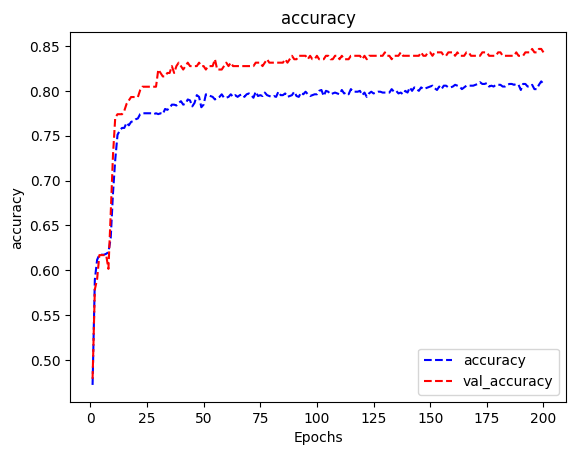

In [79]:
import matplotlib.pyplot as plt

hist_learn = history_dict[eval_tests[0]]
hist_val = history_dict[eval_tests[2]]

epochs = range(1, len(hist_learn) + 1)

# draw the loss evolution in blue
plt.plot(epochs, hist_learn, 'b--', label=eval_tests[0] )
# draw the accuracy evolution in blue
plt.plot(epochs, hist_val,   'r--', label=eval_tests[2] )
plt.title(eval_tests[0])
plt.xlabel('Epochs')
plt.ylabel(eval_tests[0])
plt.legend()

plt.show()

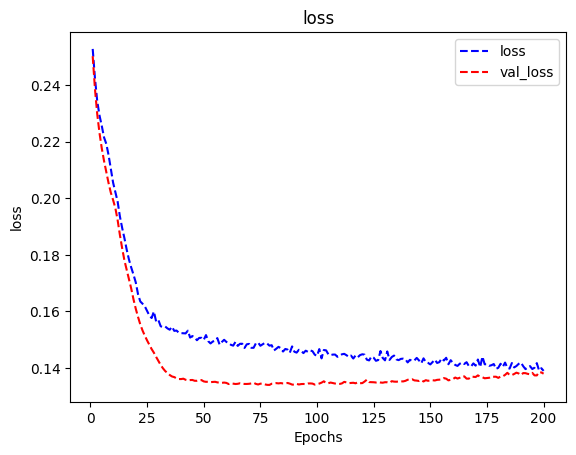

In [80]:
hist_learn = history_dict[eval_tests[1]]
hist_val = history_dict[eval_tests[3]]

epochs = range(1, len(hist_learn) + 1)

# draw the loss evolution in blue
plt.plot(epochs, hist_learn, 'b--', label=eval_tests[1] )
# draw the accuracy evolution in blue
plt.plot(epochs, hist_val, 'r--', label=eval_tests[3])
plt.title(eval_tests[1])
plt.xlabel('Epochs')
plt.ylabel(eval_tests[1])
plt.legend()

plt.show()

---
## Utilisation du réseau
Déterminez la probabilité de réussite :
 - Pour une femme de 25 ans, qui a acheté un billet à 100£ (115000€ actuels), en voyageant seule en cabine C, en classe 1, quelle est la chance de survie ?
   - transformer en vecteur  [classe, genre, age, famille, prix, cabine]


In [81]:
woman = np.array([1/maxi_classe, 1, 25/maxi_age, 0/maxi_family, 100/maxi_fare,  2/maxi_embarked])

In [82]:
woman_prediction_survie = model.predict(np.array([woman]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [83]:
print(woman_prediction_survie)

[[0.99043006]]


 - Pour un homme de 35 ans, qui a acheté un billet à 60£ (70 000€ actuels), en voyageant en en couple en cabine S, en classe 2, quelle est la chance de survie ?
   - transformer en vecteur  [classe, genre, age, famille, prix, cabine]

In [84]:
man = np.array([2/maxi_classe, 0, 35/maxi_age, 1/maxi_family, 60/maxi_fare,   1/maxi_embarked])

In [85]:
man_prediction_survie = model.predict(np.array([man]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [86]:
print(man_prediction_survie)

[[0.12933433]]
